In [1]:
import os
import itkwidgets
from itkwidgets import view
import numpy as np
import glob
%pylab 
%matplotlib inline

import csv
from os import path as osp
import seaborn as sns

Using matplotlib backend: agg
Populating the interactive namespace from numpy and matplotlib


# Emphysema

First, we visualize some examples of low and high emphysema from the dataset.

In [2]:
# Set up patch index here
patch_idx = 64

## High

In [9]:
patch_dir = os.path.join('/ocean/projects/asc170022p/rohit33/emphysemapatches/hi/', str(patch_idx))
patch_files = glob.glob(patch_dir + '/*.npy')

In [10]:
patch_files[:5]

['/ocean/projects/asc170022p/rohit33/emphysemapatches/hi/64/17476M.npy',
 '/ocean/projects/asc170022p/rohit33/emphysemapatches/hi/64/22931R.npy',
 '/ocean/projects/asc170022p/rohit33/emphysemapatches/hi/64/10921Y.npy',
 '/ocean/projects/asc170022p/rohit33/emphysemapatches/hi/64/21526D.npy',
 '/ocean/projects/asc170022p/rohit33/emphysemapatches/hi/64/17858A.npy']

In [11]:
patch_arr = np.load(patch_files[50])
view(patch_arr, axes=True, vmin=4000, vmax=17000, gradient_opacity=0.9)

Viewer(axes=True, geometries=[], gradient_opacity=0.9, point_sets=[], rendered_image=<itk.itkImagePython.itkIm…

# Low

In [12]:
patch_dir = os.path.join('/ocean/projects/asc170022p/rohit33/emphysemapatches/lo/', str(patch_idx))
patch_files = glob.glob(patch_dir + '/*.npy')

In [13]:
patch_arr = np.load(patch_files[41])
view(patch_arr, axes=True, vmin=4000, vmax=17000, gradient_opacity=0.9)

Viewer(axes=True, geometries=[], gradient_opacity=0.9, point_sets=[], rendered_image=<itk.itkImagePython.itkIm…

<br><br>
# Visualize GAN loss

Given the training log, visualize the generator and discriminator losses. <br>
Also visualize other losses like identity loss, reconstruction loss, etc.

In [3]:
# rootdir = '/ocean/projects/asc170022p/rohit33/cyclegan_models/checkpoints/resnet9_withfinal_copd_emphysema/'
# rootdir = '/ocean/projects/asc170022p/rohit33/cyclegan_models/checkpoints/copd_emphysema_resnet9/'
rootdir = '/ocean/projects/asc170022p/rohit33/cyclegan_models/checkpoints/copd_frangi_resnet9/'

# rootdir = '/ocean/projects/asc170022p/rohit33/cyclegan_models/checkpoints/emphysema_resnet9_part10/'
logfile = osp.join(rootdir, 'loss_log.txt')
with open(logfile, 'r') as fi:
    nrows = fi.read().split('\n')[1:-1]
    rows = []
    for row in nrows:
        if 'Training Loss' in row:
            continue
        rows.append(row)
    
for _ in rows[:5]:
    print(_)

(epoch: 1, iters: 100, time: 0.254, data: 25.762) D_A: 2.793 G_A: 2.394 cycle_A: 8.964 idt_A: 1.566 D_B: 2.966 G_B: 3.403 cycle_B: 7.718 idt_B: 1.807 
(epoch: 1, iters: 200, time: 0.059, data: 0.002) D_A: 52.321 G_A: 46.742 cycle_A: 9.005 idt_A: 1.502 D_B: 41.400 G_B: 32.333 cycle_B: 7.406 idt_B: 1.860 
(epoch: 1, iters: 300, time: 0.057, data: 0.002) D_A: 25.009 G_A: 37.130 cycle_A: 9.352 idt_A: 1.670 D_B: 21.754 G_B: 39.002 cycle_B: 8.676 idt_B: 1.889 
(epoch: 1, iters: 400, time: 0.062, data: 0.002) D_A: 17.384 G_A: 30.387 cycle_A: 9.094 idt_A: 1.601 D_B: 14.556 G_B: 16.711 cycle_B: 8.448 idt_B: 1.805 
(epoch: 1, iters: 500, time: 0.062, data: 0.006) D_A: 7.726 G_A: 7.931 cycle_A: 9.723 idt_A: 1.652 D_B: 17.198 G_B: 36.903 cycle_B: 8.770 idt_B: 1.927 


In [4]:
losses = dict()
for row in rows:
    for token in [':', ',', '(', ')']:
        row = row.replace(token, '')
    
    key = None
    for token in row.split(' '):
        if key is None:
            key = token
        else:
            val = float(token)
            losses[key] = losses.get(key, []) + [val]
            key = None

print(losses.keys())

dict_keys(['epoch', 'iters', 'time', 'data', 'D_A', 'G_A', 'cycle_A', 'idt_A', 'D_B', 'G_B', 'cycle_B', 'idt_B'])


In [5]:
# print(len(losses['G_A']))
N = 10

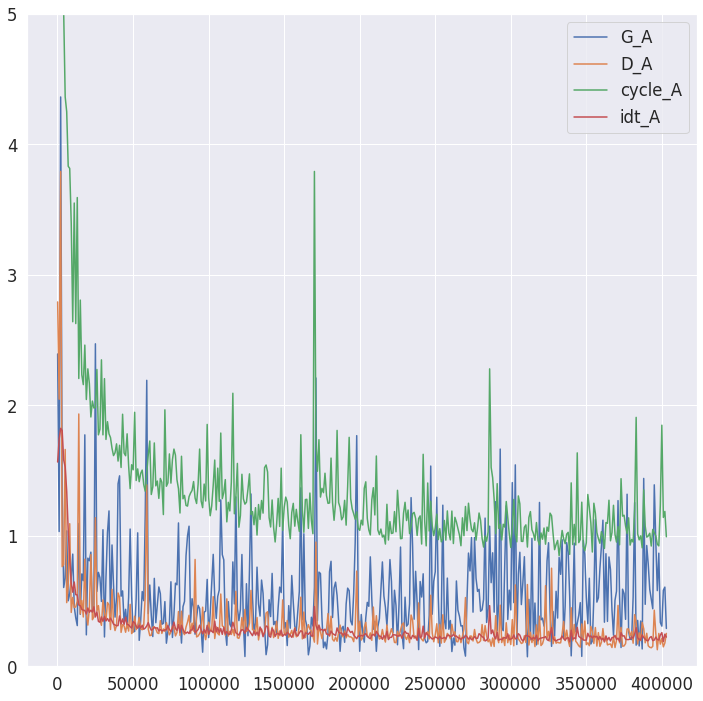

In [6]:
# Plot G_A and D_A
sns.set_style('darkgrid')
sns.set(font_scale=1.5)
plt.figure(figsize=(12, 12))
sns.lineplot(x=losses['iters'][::N], y=losses['G_A'][::N])
sns.lineplot(x=losses['iters'][::N], y=losses['D_A'][::N])
sns.lineplot(x=losses['iters'][::N], y=losses['cycle_A'][::N])
sns.lineplot(x=losses['iters'][::N], y=losses['idt_A'][::N])
plt.ylim(0, 5)
plt.legend(['G_A', 'D_A', 'cycle_A', 'idt_A'])

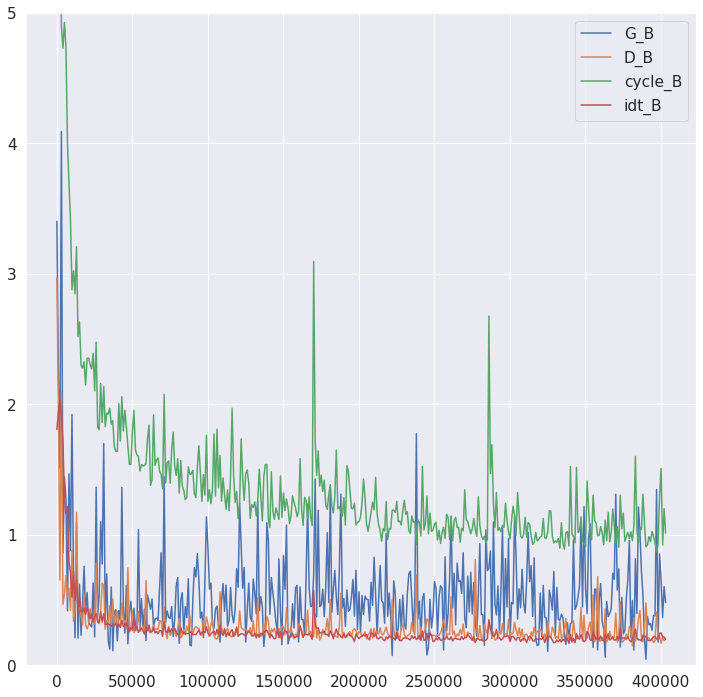

In [7]:
sns.set_style('darkgrid')
sns.set(font_scale=1.4)
plt.figure(figsize=(12, 12))
sns.lineplot(x=losses['iters'][::N], y=losses['G_B'][::N])
sns.lineplot(x=losses['iters'][::N], y=losses['D_B'][::N])
sns.lineplot(x=losses['iters'][::N], y=losses['cycle_B'][::N])
sns.lineplot(x=losses['iters'][::N], y=losses['idt_B'][::N])
plt.ylim(0, 5)
plt.legend(['G_B', 'D_B', 'cycle_B', 'idt_B'])

<br> <br>
# CycleGAN checkpoints

Here, we visualize the checkpoints saved by our learnt CycleGAN model

In [7]:
imagesdir = osp.join(rootdir, 'web/images')

# Look out for checkpoints
for r, dirs, files in os.walk(imagesdir):
    dirs = list(map(lambda x: osp.join(r, x), dirs))
    dirs = sorted(dirs, key=os.path.getmtime)
    checkpoints = list(map(lambda x: (x.split('/')[-1]), dirs))
    break

for ckpt, d in zip(checkpoints, dirs[:5]):
    print(ckpt, d)

print()
print(checkpoints)

004000 /ocean/projects/asc170022p/rohit33/cyclegan_models/checkpoints/copd_frangi_resnet9/web/images/004000
008000 /ocean/projects/asc170022p/rohit33/cyclegan_models/checkpoints/copd_frangi_resnet9/web/images/008000
012000 /ocean/projects/asc170022p/rohit33/cyclegan_models/checkpoints/copd_frangi_resnet9/web/images/012000
016000 /ocean/projects/asc170022p/rohit33/cyclegan_models/checkpoints/copd_frangi_resnet9/web/images/016000
020000 /ocean/projects/asc170022p/rohit33/cyclegan_models/checkpoints/copd_frangi_resnet9/web/images/020000

['004000', '008000', '012000', '016000', '020000', '024000', '028000', '032000', '036000', '040000', '044000', '048000', '052000', '056000', '060000', '064000', '068000', '072000', '076000', '080000', '084000', '088000', '092000', '096000', '100000', '104000', '108000', '112000', '116000', '120000', '124000', '128000', '132000', '136000', '140000', '144000', '148000', '152000', '156000', '160000', '164000', '168000', '172000', '176000', '180000', '184000'

### Given checkpoint numbers, visualize real and fake images

In [72]:
ckpt = '116000'

ckptdir = osp.join(imagesdir, ckpt)
files = sorted(glob.glob(osp.join(ckptdir, '*npy')))
print(ckptdir)

# for fi in files:
#     print(fi)

/ocean/projects/asc170022p/rohit33/cyclegan_models/checkpoints/copd_frangi_resnet9/web/images/116000


In [47]:
batchidx = 6

In [43]:
# Given checkpoint directory, load real and fake images
real_A = np.load(osp.join(ckptdir, 'real_A.npy'))
# real_A_patchidx = np.load(osp.join(ckptdir, 'real_A_patchidx.npy'))
real_B = np.load(osp.join(ckptdir, 'real_B.npy'))

fake_A = np.load(osp.join(ckptdir, 'fake_A.npy'))
# real_B_patchidx = np.load(osp.join(ckptdir, 'real_B_patchidx.npy'))
fake_B = np.load(osp.join(ckptdir, 'fake_B.npy'))

rec_A = np.load(osp.join(ckptdir, 'rec_A.npy'))
rec_B = np.load(osp.join(ckptdir, 'rec_B.npy'))

In [51]:
# Load a real image
# print(real_A_patchidx[batchidx])
view(real_A[batchidx, 0], axes=True, gradient_opacity=0.1)

Viewer(axes=True, geometries=[], gradient_opacity=0.1, point_sets=[], rendered_image=<itk.itkImagePython.itkIm…

In [53]:
view(fake_B[batchidx, 0], axes=True, gradient_opacity=0.1)

Viewer(axes=True, geometries=[], gradient_opacity=0.1, point_sets=[], rendered_image=<itk.itkImagePython.itkIm…

In [54]:
view(rec_A[batchidx, 0], axes=True, gradient_opacity=0.1)

Viewer(axes=True, geometries=[], gradient_opacity=0.1, point_sets=[], rendered_image=<itk.itkImagePython.itkIm…

## Real image from high emphysema

In [73]:
batchidx = 2

In [74]:
# print(real_B_patchidx[batchidx])
view(real_B[batchidx, 0], axes=True, gradient_opacity=0.1)

Viewer(axes=True, geometries=[], gradient_opacity=0.1, point_sets=[], rendered_image=<itk.itkImagePython.itkIm…

In [75]:
view(fake_A[batchidx, 0], axes=True, gradient_opacity=0.1)

Viewer(axes=True, geometries=[], gradient_opacity=0.1, point_sets=[], rendered_image=<itk.itkImagePython.itkIm…

In [71]:
view(rec_B[batchidx, 0], axes=True, gradient_opacity=0.1)

Viewer(axes=True, geometries=[], gradient_opacity=0.1, point_sets=[], rendered_image=<itk.itkImagePython.itkIm…